# Source Count Analysis

This notebook contains code for plotting the number of certificates, names, or sites found over time by Censys and CT, as well as the overlap between the two. If you are interested in generating these plots by a script, then I recommend using the script that is (or will be) provided in this repository. (This notebook contains a more detailed walkthrough of what the script actually does, and is included here in the spirit of transparency.)

In [58]:
# Imports
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

We begin by specifying the location of our data file.

The data file must ba a CSV file with four columns, `obs_date` (date strings in the form `YYYY-MM-DD`, `censys_certs`, `ct_certs`, and `combined_certs` (integers representing the count of unique certificates in Censys, CT, and their intersection, respectively). Note that since we will later access these columns by name, the only restriction on the table format is that `obs_date` must be the leftmost column.

In [59]:
# Directories (should be cross-platform)
NOTEBOOK_DIR = os.path.abspath(os.path.curdir)
ANALYSIS_DIR = os.path.dirname(NOTEBOOK_DIR)
CAPS_ROOT_DIR = os.path.dirname(ANALYSIS_DIR)
DATA_SUBDIR = os.path.join(ANALYSIS_DIR, 'data')

# Base names of relevant data files
CERTS_BASENAME = 'all_name_count_valid_20180726.csv'

# Create the full path names by joining the directory to relevant basename
CERTS_PATH = os.path.join(DATA_SUBDIR, CERTS_BASENAME)

Next, we read this file into a data frame. and separate out the columns.

In [60]:
df = pd.read_csv(CERTS_PATH, header=0, index_col=0, parse_dates=True)
dates = df.index
censys = df.loc[:, 'censys_names']
ct = df.loc[:, 'ct_names']
combined = df.loc[:, 'combined_names']

Now we create an empty figure and axes to plot on.

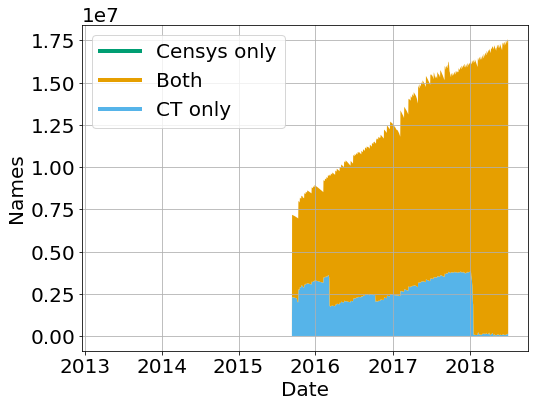

In [62]:
# Create a figure with the specified size
WIDTH = 8
HEIGHT = 6
fig = plt.figure(figsize=(WIDTH, HEIGHT))

# Create the plot
# These colors are taken from a colorblind-friendly scheme
# (http://jfly.iam.u-tokyo.ac.jp/color/#see)
CT_COLOR = '#56b4e9'
COMBINED_COLOR = '#e69f00'
CENSYS_COLOR='#009e73'
ax = plt.axes()
#ax.set_yscale('log')
ax.fill_between(dates, 0, censys - combined, facecolor=CT_COLOR)
ax.fill_between(dates, censys - combined, censys, facecolor=COMBINED_COLOR)
#ax.fill_between(dates, censys, ct + censys - combined, facecolor=CENSYS_COLOR)
ax.set_xlabel('Date')
ax.set_ylabel('Names')
ax.grid(True)

# Make the legend
LINE_WIDTH = 4
LOCATION = 2  # Upper left
custom_lines = [
    matplotlib.lines.Line2D([0], [0], color=CENSYS_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=COMBINED_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=CT_COLOR, lw=LINE_WIDTH),
]
ax.legend(custom_lines, ['Censys only', 'Both', 'CT only'], loc=LOCATION)

# Update font sizes
FONT_SIZE=20
matplotlib.rcParams.update({'font.size': FONT_SIZE})

In [69]:
ct

obs_date
2013-03-26      1553433
2013-03-27      1551402
2013-03-28      1548899
2013-03-29      1546075
2013-03-30      1542856
2013-03-31      1539735
2013-04-01      1537242
2013-04-02      1535112
2013-04-03      1532799
2013-04-04      1530067
2013-04-05      1527522
2013-04-06      1524585
2013-04-07      1521730
2013-04-08      2098982
2013-04-09      2097581
2013-04-10      2096016
2013-04-11      2093661
2013-04-12      2091129
2013-04-13      2088452
2013-04-14      2085744
2013-04-15      2083540
2013-04-16      2081654
2013-04-17      2079491
2013-04-18      2076961
2013-04-19      2265522
2013-04-20      2263439
2013-04-21      2260999
2013-04-22      2355007
2013-04-23      2432067
2013-04-24      2494737
                ...    
2018-06-04    165481548
2018-06-05    166167492
2018-06-06    167118269
2018-06-07    167682572
2018-06-08    168049941
2018-06-09    168300308
2018-06-10    168562966
2018-06-11    168996258
2018-06-12    170330361
2018-06-13    171349429
2018-06

In [54]:
FIG_SUBDIR = os.path.join(ANALYSIS_DIR, 'fig')
OUT_FILE = os.path.join(FIG_SUBDIR, 'name_count_valid.pdf')
fig.savefig(OUT_FILE, bbox_inches='tight')

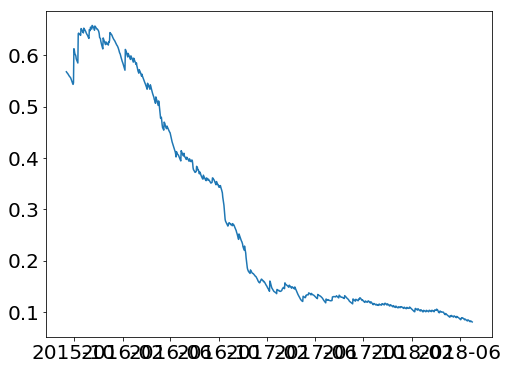

In [38]:
def new_figure(width, height):
    fig = plt.figure(figsize=(width, height))
    ax = plt.axes()
    return fig, ax

prop_fig, prop_ax = new_figure(WIDTH, HEIGHT)
prop = censys / (ct + censys - combined)
prop_ax.plot(dates[prop != 0], prop[prop != 0])

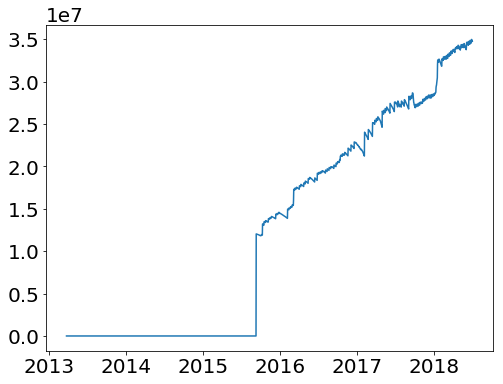

In [57]:
total = ct + censys - combined
f, a = new_figure(WIDTH, HEIGHT)
a.plot(dates, censys + combined)

In [44]:
total.shift(1)

obs_date
2013-03-26            NaN
2013-03-27       828757.0
2013-03-28       827612.0
2013-03-29       826232.0
2013-03-30       824671.0
2013-03-31       822965.0
2013-04-01       821245.0
2013-04-02       819655.0
2013-04-03       818310.0
2013-04-04       816998.0
2013-04-05       815582.0
2013-04-06       814109.0
2013-04-07       812481.0
2013-04-08       810913.0
2013-04-09      1137403.0
2013-04-10      1136112.0
2013-04-11      1134775.0
2013-04-12      1133117.0
2013-04-13      1131343.0
2013-04-14      1129426.0
2013-04-15      1127497.0
2013-04-16      1125794.0
2013-04-17      1124372.0
2013-04-18      1122821.0
2013-04-19      1121084.0
2013-04-20      1234952.0
2013-04-21      1232929.0
2013-04-22      1230789.0
2013-04-23      1283716.0
2013-04-24      1325820.0
                 ...     
2018-06-04     96021567.0
2018-06-05     96330868.0
2018-06-06     96581819.0
2018-06-07     96890250.0
2018-06-08     97042272.0
2018-06-09     97159920.0
2018-06-10     97170193.0
201